In [1]:
%matplotlib inline
import glob, os
import matplotlib as mpl
import numpy as np
import cPickle
from tqdm import tqdm
from collections import defaultdict, Counter
from matplotlib import pyplot as plt

In [2]:
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

# Model and Data Comparisons

In [3]:
dirs_dict = {}
dirs_dict['wordnet'] = glob.glob('exp_results/vqa_wordnet_*')
dirs_dict['description'] = glob.glob('exp_results/vqa_description_*')
dirs_dict['proposed'] = glob.glob('exp_results/vqa_proposed_*')
dirs_dict['separable_classifier'] = glob.glob('exp_results/vqa_separable_*')
dirs_dict['answer_embedding'] = glob.glob('exp_results/vqa_answer-embedding_default*')
dirs_dict['standard'] = glob.glob('exp_results/vqa_standard-vqa_default*')

In [4]:
titles = ['Total [Object + Attribute]', 'Object Answers', 'Attribute Answers']
names = ['new_testonly_score', 'new_test_obj_only_score', 'new_test_attr_only_score']

In [5]:
data_dict = {}
data_summary_dict = {}
for key in dirs_dict:
    data_dict[key] = defaultdict(list)
    for a_dir in dirs_dict[key]:
        r = cPickle.load(open(os.path.join(a_dir, 'collect_eval_test_result.pkl'), 'rb'))
        for r_key in r:
            data_dict[key][r_key].append(r[r_key])

    new_data_dict = defaultdict(list)
    for l in range(len(data_dict[key]['iter'])):
        if len(data_dict[key]['iter'][l]) == 0:
            continue
        for k in data_dict[key]:
            new_data_dict[k].append(data_dict[key][k][l])
    data_dict[key] = new_data_dict
    min_len = min([len(l) for l in data_dict[key]['iter']])
    data_summary_dict[key] = {}
    data_summary_dict[key]['iter'] = data_dict[key]['iter'][0][:min_len]
    
    for name in names:
        data_summary_dict[key][name] = []
        for w in data_dict[key][name]:
            data_summary_dict[key][name].append(w[:min_len])
    
        data_summary_dict[key][name] = np.array(data_summary_dict[key][name])
        data_summary_dict[key][name + '_mean'] = data_summary_dict[key][name].mean(axis=0)
        data_summary_dict[key][name + '_std'] = data_summary_dict[key][name].std(axis=0)

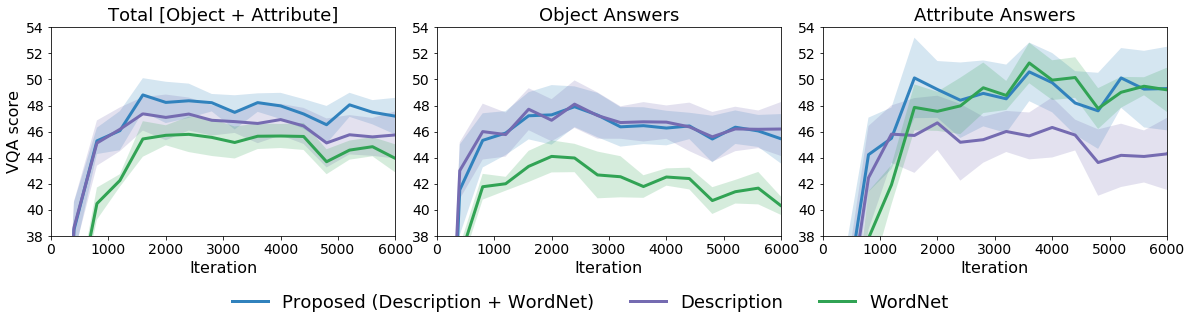

In [6]:
plt.figure(figsize=(20,5))
y_lims = [(38, 54), (38, 54), (38, 54)]
linecolors = {
    'proposed': '#3182bd',
    'description': '#756bb1',
    'wordnet': '#31a354',
}
facecolors = {
    'proposed': '#3182bd',
    'description': '#756bb1',
    'wordnet': '#31a354',
}
for i, (title, name, y_lim) in enumerate(zip(titles, names, y_lims)):
    plt.subplot(1, 3, i+1)
    for res_key in ['proposed', 'description', 'wordnet']:
        res = data_summary_dict[res_key]
        x = res['iter']
        y = res[name + '_mean'] * 100
        y_err = res[name + '_std'] * 100
        plt.plot(x, y, linewidth=3, color=linecolors[res_key])
        plt.fill_between(x, y - y_err, y + y_err, facecolor=facecolors[res_key], alpha=0.2)
    plt.subplots_adjust(wspace=0.12)
    plt.title(title, fontsize=18)
    plt.ylim(y_lim)
    plt.xlim((0, 6000))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i == 0:
        plt.ylabel('VQA score', fontsize=16)
    plt.xlabel('Iteration', fontsize=16)

plt.figlegend(
    ['Proposed (Description + WordNet)', 'Description', 'WordNet'],
    loc='lower center', ncol=5, fontsize=18, bbox_to_anchor=(0.41, 0.02),
    frameon=False)
plt.subplots_adjust(bottom=0.3)

plt.savefig('images/data_comparison_with_std.png',bbox_inches='tight')
plt.show()

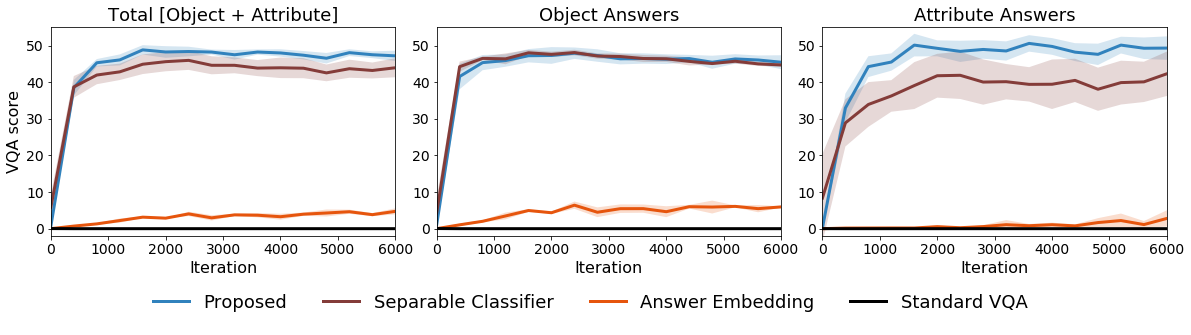

In [7]:
plt.figure(figsize=(20,5))
y_lims = [(-2, 55), (-2, 55), (-2, 55)]
linecolors = {
    'proposed': '#3182bd',
    'separable_classifier': '#843c39',
    'answer_embedding': '#e6550d',
    'standard': 'black'
}
facecolors = {
    'proposed': '#3182bd',
    'separable_classifier': '#843c39',
    'answer_embedding': '#e6550d',
    'standard': 'black'
}
for i, (title, name, y_lim) in enumerate(zip(titles, names, y_lims)):
    plt.subplot(1, 3, i+1)
    for res_key in ['proposed', 'separable_classifier', 'answer_embedding', 'standard']:
        res = data_summary_dict[res_key]
        x = res['iter']
        y = res[name + '_mean'] * 100
        y_err = res[name + '_std'] * 100
        plt.plot(x, y, linewidth=3, color=linecolors[res_key])
        plt.fill_between(x, y - y_err, y + y_err, facecolor=facecolors[res_key], alpha=0.2)
    plt.subplots_adjust(wspace=0.12)
    plt.title(title, fontsize=18)
    plt.ylim(y_lim)
    plt.xlim((0, 6000))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i == 0:
        plt.ylabel('VQA score', fontsize=16)
    plt.xlabel('Iteration', fontsize=16)

plt.figlegend(
    ['Proposed', 'Separable Classifier', 'Answer Embedding', 'Standard VQA'],
    loc='lower center', ncol=4, fontsize=18, bbox_to_anchor=(0.41, 0.02),
    frameon=False)
plt.subplots_adjust(bottom=0.3)

if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig('images/model_comparison_with_std.png',bbox_inches='tight')
plt.show()

# Score per answer plot

In [8]:
genome_dir = 'data/preprocessed/visualgenome/memft_all_new_vocab50_obj3000_attr1000_maxlen10'
vqa_dir = 'data/preprocessed/vqa_v2/qa_split_objattr_answer_3div4_genome_memft_check_all_answer_thres1_50000_thres2_-1'
genome_img_dir = 'data/VisualGenome/VG_100K'
vqa_img_dir = 'data/VQA_v2/images'

def get_score(occurrence):
    if occurrence == 0:
        return 0
    elif occurrence == 1:
        return 0.3
    elif occurrence == 2:
        return 0.6
    elif occurrence == 3:
        return 0.9
    else: return 1.0

In [9]:
vqa_anno = cPickle.load(open(os.path.join(vqa_dir, 'merged_annotations.pkl'), 'rb'))

In [10]:
qa_split = cPickle.load(open(os.path.join(vqa_dir, 'qa_split.pkl'), 'rb'))

In [11]:
qa_dict = cPickle.load(open(os.path.join(vqa_dir, 'answer_dict.pkl'), 'rb'))

In [12]:
not_test_answers = qa_dict['vocab'][:qa_dict['num_train_answer']]
test_answers = qa_dict['vocab'][qa_dict['num_train_answer']:]

In [13]:
not_test_answer_set = set(not_test_answers)
pure_test_qids = []
for qid in tqdm(qa_split['test']):
    anno = vqa_anno[qid]
    answers_set = set(anno['processed_answers'])
    if len(not_test_answer_set & answers_set) == 0:
        pure_test_qids.append(qid)

100%|██████████| 115121/115121 [00:00<00:00, 217137.36it/s]


In [14]:
# description
q_embed_dir1 = 'exp_results/vqa_description_pretrainseed234_bs512_lr0.001_seed234/model-1601_eval_test_20190403-222746'
# wordnet
q_embed_dir2 = 'exp_results/vqa_wordnet_pretrainseed234_bs512_lr0.001_seed234/model-1601_eval_test_20190403-222747'

q_embed_dict = cPickle.load(open(q_embed_dir1 + '/results.pkl', 'rb'))
qid2res1 = q_embed_dict['qid2result']
q_embed_dict = cPickle.load(open(q_embed_dir2 + '/results.pkl', 'rb'))
qid2res2 = q_embed_dict['qid2result']

test_answer_set = set(test_answers)

In [15]:
for qid in tqdm(vqa_anno):
    anno = vqa_anno[qid]
    anno['answer_count'] = dict(Counter(anno['processed_answers']))

100%|██████████| 658111/658111 [00:03<00:00, 166117.32it/s]


In [16]:
qid2res = qid2res1
ans2scores1 = defaultdict(list)
qtype2scores1 = defaultdict(list)
atype2scores1 = defaultdict(list)
for qid in pure_test_qids:
    res = qid2res[qid]
    anno = vqa_anno[qid]
    qtype2scores1[anno['question_type']].append(res['score'])
    atype2scores1[anno['answer_type']].append(res['score'])
    for ans, cnt in anno['answer_count'].items():
        ans_score = get_score(cnt)
        if ans in test_answers:
            ans2scores1[ans].append(min(res['score'], ans_score) / float(ans_score))
            
qid2res = qid2res2
ans2scores2 = defaultdict(list)
qtype2scores2 = defaultdict(list)
atype2scores2 = defaultdict(list)
for qid in pure_test_qids:
    res = qid2res[qid]
    anno = vqa_anno[qid]
    qtype2scores2[anno['question_type']].append(res['score'])
    atype2scores2[anno['answer_type']].append(res['score'])
    for ans, cnt in anno['answer_count'].items():
        ans_score = get_score(cnt)
        if ans in test_answers:
            ans2scores2[ans].append(min(res['score'], ans_score) / float(ans_score))

In [17]:
exist_answers = list(set(ans2scores1.keys()) | set(ans2scores2.keys()))

ans2avg_score1 = {ans: np.array(scores).mean() for ans, scores in ans2scores1.items()}
qtype2avg_score1 = {qtype: np.array(scores).mean() for qtype, scores in qtype2scores1.items()}
atype2avg_score1 = {atype: np.array(scores).mean() for atype, scores in atype2scores1.items()}

ans2avg_score2 = {ans: np.array(scores).mean() for ans, scores in ans2scores2.items()}
qtype2avg_score2 = {qtype: np.array(scores).mean() for qtype, scores in qtype2scores2.items()}
atype2avg_score2 = {atype: np.array(scores).mean() for atype, scores in atype2scores2.items()}

ans2avg_scores = {}
for ans in test_answers:
    s1 = ans2avg_score1.get(ans, 0)
    s2 = ans2avg_score2.get(ans, 0)
    ans2avg_scores[ans] = (s1, s2)
    
qtype2avg_scores = {}
for qtype in qtype2avg_score1:
    s1 = qtype2avg_score1.get(qtype, 0)
    s2 = qtype2avg_score2.get(qtype, 0)
    qtype2avg_scores[qtype] = (s1, s2)
atype2avg_scores = {}
for atype in atype2avg_score1:
    s1 = atype2avg_score1.get(atype, 0)
    s2 = atype2avg_score2.get(atype, 0)
    atype2avg_scores[atype] = (s1, s2)
    
ans, s12 = zip(*sorted(ans2avg_scores.items(), key=lambda x: max(x[1][0], x[1][1]), reverse=True))
s1, s2 = zip(*s12)

qtypes, qtype_s12 = zip(*sorted(qtype2avg_scores.items(), key=lambda x: max(x[1][0], x[1][1]), reverse=True))
qtype_s1, qtype_s2 = zip(*qtype_s12)

atypes, atype_s12 = zip(*sorted(atype2avg_scores.items(), key=lambda x: max(x[1][0], x[1][1]), reverse=True))
atype_s1, atype_s2 = zip(*atype_s12)

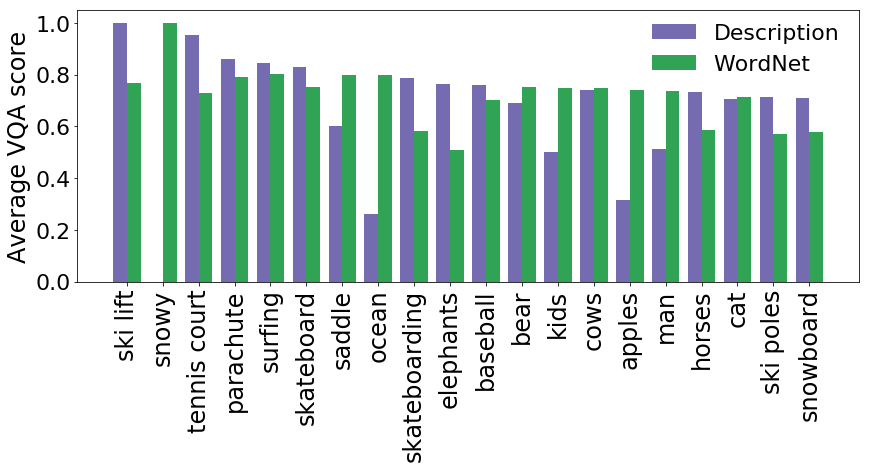

In [18]:
plt.figure(figsize=(14, 5))
i = 2
j = i + 20
i_ans = list(ans)[i:j]
range_ans = np.array(list(range(len(i_ans))))
bar_width = 0.5
plt.bar(range_ans *1.3, list(s1)[i:j], bar_width, tick_label=i_ans, color='#756bb1')
plt.bar(range_ans*1.3+bar_width, list(s2)[i:j], bar_width, tick_label=i_ans, color='#31a354')
plt.xticks(range_ans*1.3 + bar_width * 0.5, i_ans, rotation='vertical', fontsize=24)
plt.yticks(fontsize=22)
plt.ylabel('Average VQA score', fontsize=24)
plt.legend(['Description', 'WordNet'], fontsize=22, bbox_to_anchor=(0.71, 0.69), frameon=False)
plt.savefig('images/score_per_answer.png', bbox_inches='tight')
plt.show()

# Model comparison in VQA with seen answers in test set

In [19]:
dirs_dict = {}
dirs_dict['proposed'] = glob.glob('exp_results/vqa_proposed-seen-in-test_pretrainseed*')
dirs_dict['answer_embedding'] = glob.glob('exp_results/vqa_answer-embedding_seen-in-test*')
dirs_dict['standard'] = glob.glob('exp_results/vqa_standard-vqa_seen-in-test_bs512_lr0.001_seed*')

In [20]:
titles = ['Test: All Answers', 'Test: Trained Answers', 'Test: Out-of-vocabulary Answers']
names = ['new_total_total_score', 'new_no_test_total_score', 'new_no_train_total_score']

In [21]:
data_dict = {}
data_summary_dict = {}
for key in dirs_dict:
    data_dict[key] = defaultdict(list)
    for a_dir in dirs_dict[key]:
        r = cPickle.load(open(os.path.join(a_dir, 'collect_eval_test_result.pkl'), 'rb'))
        for r_key in r:
            data_dict[key][r_key].append(r[r_key])

    new_data_dict = defaultdict(list)
    for l in range(len(data_dict[key]['iter'])):
        if len(data_dict[key]['iter'][l]) == 0:
            continue
        for k in data_dict[key]:
            if len(data_dict[key][k]) > l:
                new_data_dict[k].append(data_dict[key][k][l])
    data_dict[key] = new_data_dict
    min_len = min([len(l) for l in data_dict[key]['iter']])
    data_summary_dict[key] = {}
    data_summary_dict[key]['iter'] = data_dict[key]['iter'][0][:min_len]
    
    for name in names:
        data_summary_dict[key][name] = []
        for w in data_dict[key][name]:
            data_summary_dict[key][name].append(w[:min_len])
    
        data_summary_dict[key][name] = np.array(data_summary_dict[key][name])
        data_summary_dict[key][name + '_mean'] = data_summary_dict[key][name].mean(axis=0)
        data_summary_dict[key][name + '_std'] = data_summary_dict[key][name].std(axis=0)

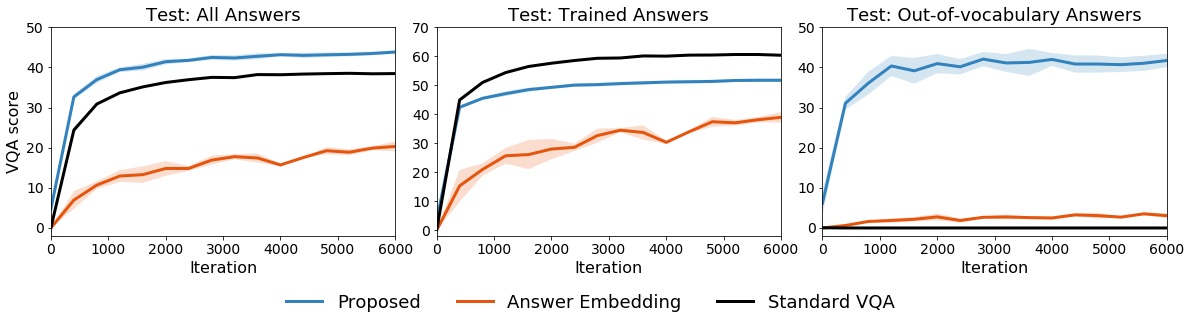

In [22]:
plt.figure(figsize=(20,5))
y_lims = [(-2, 50), (-2, 70), (-2, 50)]
linecolors = {
    'proposed': '#3182bd',
    'answer_embedding': '#e6550d',
    'standard': 'black'
}
facecolors = {
    'proposed': '#3182bd',
    'answer_embedding': '#e6550d',
    'standard': 'black'
}
for i, (title, name, y_lim) in enumerate(zip(titles, names, y_lims)):
    plt.subplot(1, 3, i+1)
    for res_key in ['proposed', 'answer_embedding', 'standard']:
        res = data_summary_dict[res_key]
        x = res['iter']
        y = res[name + '_mean'] * 100
        y_err = res[name + '_std'] * 100
        plt.plot(x, y, linewidth=3, color=linecolors[res_key])
        plt.fill_between(x, y - y_err, y + y_err, facecolor=facecolors[res_key], alpha=0.2)
    plt.subplots_adjust(wspace=0.12)
    plt.title(title, fontsize=18)
    plt.ylim(y_lim)
    plt.xlim((0, 6000))
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    if i == 0:
        plt.ylabel('VQA score', fontsize=16)
    plt.xlabel('Iteration', fontsize=16)

plt.figlegend(
    ['Proposed', 'Answer Embedding', 'Standard VQA'],
    #['Proposed', 'Standard VQA', 'Answer Embedding'],
    loc='lower center', ncol=4, fontsize=18,
    bbox_to_anchor=(0.41, 0.02), frameon=False)
plt.subplots_adjust(bottom=0.3)

plt.savefig('images/model_comparison_with_std_seen_in_test.png',bbox_inches='tight')
plt.show()